#<CENTER>**REGRESI**

> Nama : Vivi Fitriyani

> NIM : 1306620050

> Mata Kuliah : Machine Learning

> Tugas 2 Regresi

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/data_sin_noisy (1).csv')
data

,x,y
0,0.0,0.198677
1,0.1,0.484592
2,0.2,-0.367602
3,0.3,0.667027
4,0.4,0.354572
...,...,...
95,9.5,-0.367354
96,9.6,-0.342010
97,9.7,-0.332096
98,9.8,-0.113834


##1. Melakukan Split data train dan test

In [25]:
X = data[['x']].values
y = data['y'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.20, random_state=0)

##2. Membuat Model linier regresi

In [26]:
class LinearRegressionGD(object):
 
 def __init__(self, eta=0.001, n_iter=20):
  self.eta = eta
  self.n_iter = n_iter
 
 def fit(self, X, y):
  self.w_ = np.zeros(1 + X.shape[1])
  self.cost_ = []
 
 
  for i in range(self.n_iter):
    output = self.net_input(X)
    errors = (y - output)
    self.w_[1:] += self.eta * X.T.dot(errors)
    self.w_[0] += self.eta * errors.sum()
    cost = (errors**2).sum() / 2.0
    self.cost_.append(cost)
  return self

 def net_input(self, X):
  return np.dot(X, self.w_[1:]) + self.w_[0]
 
 def predict(self, X):
  return self.net_input(X)

 def coef(self, X):
  return self.net_input(X)


In [27]:
lr = LinearRegressionGD()
lr.fit(X_train, y_train)

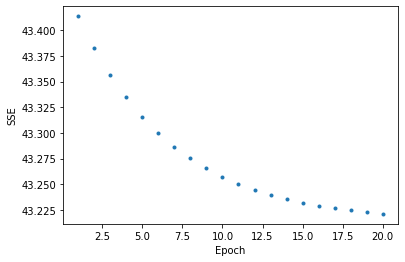

In [28]:
plt.plot(range(1, lr.n_iter+1), lr.cost_, '.')
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

**Melakukan hasil plotting data train dan fungsi regresi**

Text(0.5, 0, 'x')

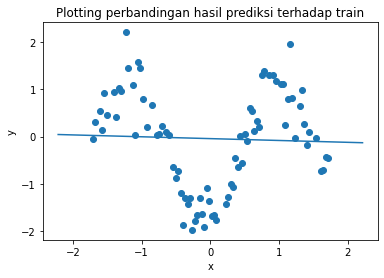

In [47]:
kiri =X_std.min()-0.5; kanan = X_std.max()+0.5
bawah =y_std.min()-0.5; atas = y_std.max()+0.5
x_fit = np.linspace(kiri, kanan, 300).reshape(-1,1)
y_fit = lr.predict(x_fit)

plt.plot(x_fit,y_fit)
plt.scatter(X_train,y_train)
plt.title('Plotting perbandingan hasil prediksi terhadap train')
plt.ylabel('y')
plt.xlabel('x')

**Menghitung nilai variasi, MSE dan Bias**

In [30]:
# Hitung nilai bias, variansi, dan MSE pada data train
y_pred = lr.predict(X_test)


# Hitung nilai bias, variansi, dan MSE pada data test
bias_test = np.mean(y_pred - y_test)
variance_test = np.var(y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print("Nilai bias pada data test:", bias_test)
print("Nilai variansi pada data test:", variance_test)
print("Nilai MSE pada data test:", mse_test)

Nilai bias pada data test: -0.24866019926365063
Nilai variansi pada data test: 0.0018316660253670611
Nilai MSE pada data test: 0.6790522466858678


berdasarkan hasil perhitungan diatas nilai bias lebih besar dibandingkan varian sehingga dapat dikatakan model underfitting

##2. linier regresi dengan orde 15

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=15)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)


In [32]:
from numpy.random import lognormal

# Train linear regression model
lrm = LinearRegression()
lrm.fit(x_train_poly, y_train)

# Make predictions on train and test data
y_train_pred = lrm.predict(x_train_poly)
y_test_pred = lrm.predict(x_test_poly)

# Print model coefficients and R-squared value
print("Model coefficients:", lrm.coef_)

Model coefficients: [  0.           1.27980737   3.82073258  -5.62237915   7.43329715
  17.69319223 -22.8908574  -27.5053621   23.65136985  21.17547997
 -12.12511574  -8.42344065   3.06959938   1.65501636  -0.30466542
  -0.12610219]


**Persamaan Linier Regresi orde 15 :**

>F(x) = 0+ 1.2798 x1 + 3.8207 x2 -5.6224 x3 + 7.4333 x4 + 17.6932 x5 -22.8909 x6 -27.5054 x7 + 23.6514 x8 + 21.1755 x9  -12.1251 x10 -8.4234 x11 + 3.0696 x12 + 1.6550 x13 -0.3047 x14

**Hasil Plotting fungsi dan data train**

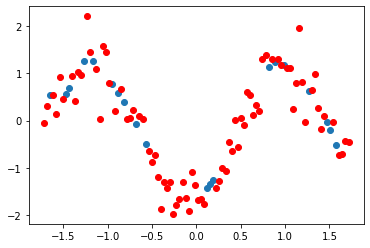

In [33]:
plt.scatter(X_test,y_test_pred)
plt.scatter(X_train,y_train, color='red')

plt.title('Plotting perbandingan hasil prediksi terhadap train')
plt.ylabel('y')
plt.xlabel('x')

**Nilai Bias Variasi dan MSE**

In [34]:
# Hitung nilai bias, variansi, dan MSE pada data train
y_pred_model = lrm.predict(x_test_poly)

# Hitung nilai bias, variansi, dan MSE pada data test
bias_test = np.mean(y_pred_model - y_test)
variance_test = np.var(y_pred_model)
mse_test = mean_squared_error(y_test, y_pred_model)

print("Nilai bias pada data test:", bias_test)
print("Nilai variansi pada data test:", variance_test)
print("Nilai MSE pada data test:", mse_test)

Nilai bias pada data test: 0.03510659964117052
Nilai variansi pada data test: 0.7344774553859135
Nilai MSE pada data test: 0.24673214680492625


berdasarkan hasil hubungan antara varian dan bias hasil dari linier regresi orde 15 adalah overfitting karena nilai varian>>bias

##3. Model linier regresi untuk orde 1 - 15

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# load data train dan test


# inisialisasi variabel hasil regresi linier, mse, varian, dan bias
mse_test = []
var_test = []
bias_test = []

# loop untuk setiap orde polinomial
for i in range(1, 16):
    # membuat objek PolynomialFeatures
    poly = PolynomialFeatures(degree=i)
    model = LinearRegression().fit(x_train_poly, y_train)
    
    # memprediksi hasil regresi linier pada data train dan test
    train_pred = model.predict(x_train_poly)
    test_pred = model.predict(x_test_poly)
    mse_test.append(mean_squared_error(y_test, test_pred))
    var_test.append(np.var(test_pred))
    bias_test.append(np.mean((y_test - np.mean(test_pred))**2))
    

# mencetak MSE, varian, dan bias pada data train dan test untuk setiap orde polinomial


for i in range(15):
    print(f"Order {i+1}: MSE = {mse_test[i]}")
    print(f"           Variance = {var_test[i]}")
    print(f"            Bias = {bias_test[i]:.4f}")

Order 1: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 2: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 3: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 4: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 5: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 6: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 7: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 8: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 9: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
            Bias = 0.6156
Order 10: MSE = 0.24673214680492625
           Variance = 0.7344774553859135
     

In [36]:
mse = []
varian = []
bias = []
orde = []
for i in range(15):
    m = mse_test[i]
    v = var_test[i]
    b = bias_test[i]
    o = i+1
    mse.append(m)
    varian.append(v)
    bias.append(b)
    orde.append(o)

Text(0.5, 0, 'Orde')

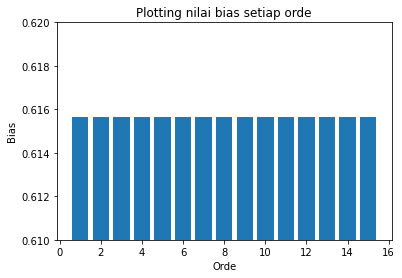

In [44]:
plt.bar(orde,bias)
plt.ylim(0.61,0.62)
plt.title('Plotting nilai bias setiap orde')
plt.ylabel('Bias')
plt.xlabel('Orde')

Text(0.5, 0, 'Orde')

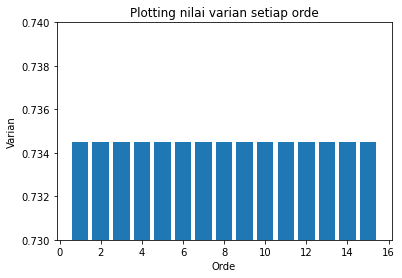

In [45]:
plt.bar(orde,varian)
plt.ylim(0.73,0.74)
plt.title('Plotting nilai varian setiap orde')
plt.ylabel('Varian')
plt.xlabel('Orde')

<ipython-input-46-a23bdc1b6df5>:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0.24,0.24)


Text(0.5, 0, 'Orde')

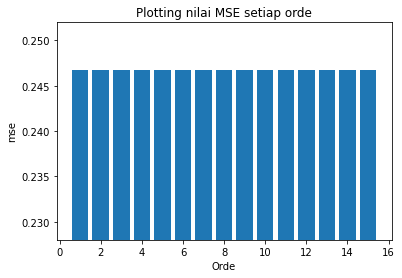

In [46]:
plt.bar(orde,mse)
plt.ylim(0.24,0.24)
plt.title('Plotting nilai MSE setiap orde')
plt.ylabel('mse')
plt.xlabel('Orde')